# A. Final Project 3 kelompok 3
---
Pada saat ini, persaingan antar bank semakin tinggi membuat setiap perusahaan harus menyiapkan strategi pemasaran produk perbankannya dengan matang. Segmentasi pasar termasuk salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. Strategi pemasaran yang tepat dengan menetapkan segmentasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

### Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>


# B. Library yang digunakan

In [115]:
# For Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Prepocessing Data 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
from pywaffle import Waffle

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# C. Data Loading

In [54]:
df = pd.read_csv("D:\semester 6\proakh\data\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [55]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [56]:
df.shape

(8950, 18)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [58]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [59]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

# D. Data Cleaning

Melakukan pengecekan apakah terdapat missing value

In [60]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada CREDIT_LIMIT sebanyak 1 data, dan MINIMUM_PAYMENT sebanyak 313. Untuk CREDIT LIMIT kita hapus saja karena data yang missing hanya 1 namun kita isi data MINIMUM PAYMENT

In [61]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [62]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Karena sudah tidak terdapat missing value, maka akan dicek apakah terdapat data yang duplikat pada dataset.

In [63]:
df.duplicated().sum()

0

 # E. Explorating Data

## menghilangkan kolom Customer ID
Hal ini dilakukan karena kolom customer id tidak dibutuhkan dalam clustering

In [64]:
data = df.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Menentukan pembayaran minimal dan maksimal pada jangka waktu layanan kartu kredit pengguna selama 12 bulan

In [65]:
data.loc[data['TENURE'] == 12, 'PURCHASES'].agg(('min', 'max'))

min        0.00
max    49039.57
Name: PURCHASES, dtype: float64

Text(0.5, 1.0, 'Credit Limit vs Balance')

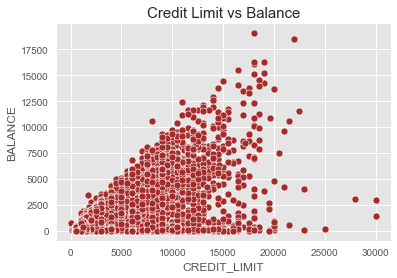

In [66]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data, color='brown')
plt.title("Credit Limit vs Balance", fontsize= 15)

Scatter plot di atas menunjukkan bahwa saat nilai variabel meningkat, varians distribusi juga ikut meningkat hingga membentuk seperti kerucut. Oleh karenanya, didapatkan bahwa terdapat korelasi positif antara CREDIT LIMIT dengan BALANCE.

In [67]:
def scatter_purchases(x):
    sns.scatterplot(y='PURCHASES',x=x,data = data,color='#171820',alpha=0.7)

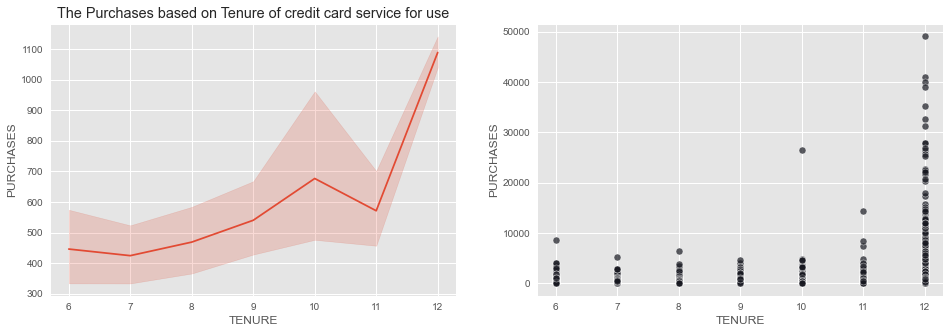

In [68]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.lineplot(x='TENURE',y='PURCHASES',data=df)
plt.title('The Purchases based on Tenure of credit card service for use')
plt.subplot(1,2,2)
scatter_purchases('TENURE')

# F. Data Preprocessing

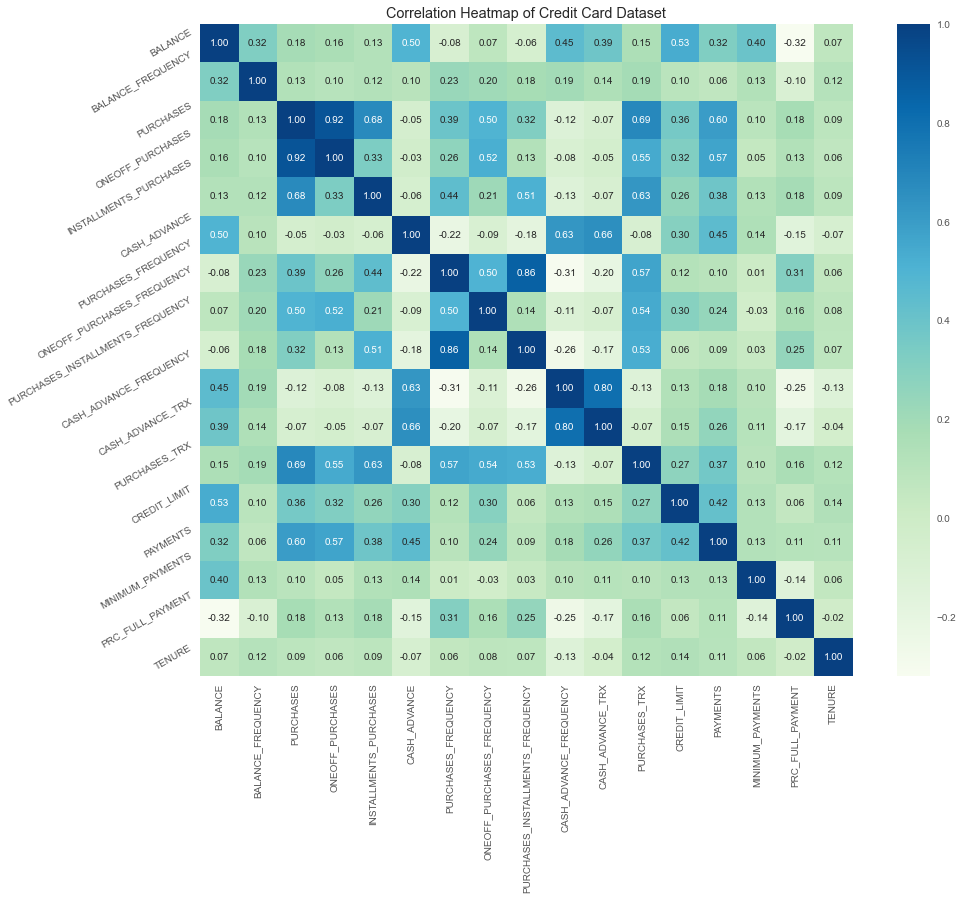

In [69]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Credit Card Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap='GnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [70]:
train_data, test_data = train_test_split(data,test_size=0.5,random_state=42)

In [71]:
#Scaling
scaling = StandardScaler()
scaling.fit(data)
scaling_data = pd.DataFrame(scaling.transform(data),columns= data.columns )

In [72]:
mm = MinMaxScaler()
train_data = mm.fit_transform(train_data)
test_data = mm.transform(test_data)

In [73]:
pt = PowerTransformer()
train_data = pt.fit_transform(train_data)
test_data = pt.transform(test_data)

# G. Modeling

## 1. KMeans

In [74]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(scaling_data)
labels = kmeans.labels_ # Labels (cluster) associated to each data point

kmeans.cluster_centers_.shape

(7, 17)

In [75]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Fit the KMeans model
y_kmeans = kmeans.fit_predict(scaling_data)
# Calculate Silhoutte Score
score = silhouette_score(scaling_data, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.209


K-MEANS CLUSTERING
- Melihat Jumlah clusters yang optimal dengan menggunakan elbow method

In [76]:
pca = PCA(n_components=2)
pca.fit(train_data)
PCA_ds = pd.DataFrame(pca.transform(train_data), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

,Principal Component 1,Principal Component 2
0,0.178439,0.833869
1,1.221433,-2.452549
2,1.434166,-2.208514
3,-2.367511,1.135443
4,3.089765,0.110567


In [77]:
pca.explained_variance_ratio_

array([0.33936068, 0.23882726])

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10))

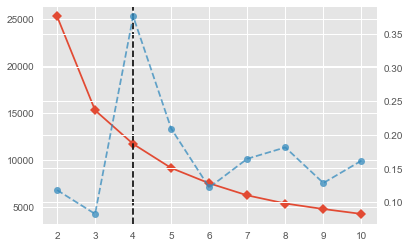

In [78]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(PCA_ds)

Melatih model KMeans dengan n_clusters sebanyak 4

In [111]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(scaling_data)
y_balance_pred = km.predict(scaling_data)

In [113]:
# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(scaling_data)

Menambahkan KMeans Segment pada dataframe

In [80]:
data_kmeans = data.copy()
data_kmeans['KMeansSegment'] = km.labels_

Melihat informasi data KMeans dengan melakukan groupby berdasarkan rata-rat KMeans segment

In [81]:
data_transf_kmeans = data_kmeans.groupby('KMeansSegment').mean()
data_transf_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeansSegment,,,,,,,,,,,,,,,,,
0,641.841667,0.902183,792.210203,166.195834,626.508480,177.480066,0.855699,0.083609,0.792875,0.037928,0.706832,16.595859,3196.358722,931.457401,665.356819,0.272573,11.455072
1,1056.602470,0.797451,278.858961,226.046815,53.014209,622.333044,0.163523,0.097238,0.065524,0.119057,2.215416,2.956866,3346.355283,1006.000756,559.300732,0.070304,11.456355
2,4619.262559,0.967852,487.480236,299.626402,187.942629,4634.621347,0.280561,0.130524,0.182051,0.491578,14.689083,7.330131,7553.453751,3602.329222,2022.598165,0.036109,11.385153
3,4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
4,1910.764703,0.979152,2946.425788,1997.715803,949.141951,360.493785,0.924562,0.732020,0.588764,0.058643,1.172786,43.719942,7003.957720,2804.129229,841.640636,0.265051,11.884089


Dari hasil grouping segment KMeans, selanjutnya kami mencoba membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [82]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeansSegment,,,,,,,,,,,,,,,,,
Pengguna Level Tengah (Middle Ground),641.841667,0.902183,792.210203,166.195834,626.508480,177.480066,0.855699,0.083609,0.792875,0.037928,0.706832,16.595859,3196.358722,931.457401,665.356819,0.272573,11.455072
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),1056.602470,0.797451,278.858961,226.046815,53.014209,622.333044,0.163523,0.097238,0.065524,0.119057,2.215416,2.956866,3346.355283,1006.000756,559.300732,0.070304,11.456355
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),4619.262559,0.967852,487.480236,299.626402,187.942629,4634.621347,0.280561,0.130524,0.182051,0.491578,14.689083,7.330131,7553.453751,3602.329222,2022.598165,0.036109,11.385153
Pengguna Kredit Hemat (Frugal Credit Users),4501.309782,0.975499,16124.096585,10943.910122,5180.186463,1053.988646,0.926626,0.766778,0.779989,0.085366,2.939024,132.548780,12358.536585,15866.407213,3400.127002,0.396699,11.963415
4,1910.764703,0.979152,2946.425788,1997.715803,949.141951,360.493785,0.924562,0.732020,0.588764,0.058643,1.172786,43.719942,7003.957720,2804.129229,841.640636,0.265051,11.884089


- Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru

In [83]:
data_kmeans['Labels'] = data_kmeans['KMeansSegment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4,NaN
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...


Analisis Segment K-Means

Disini dilakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

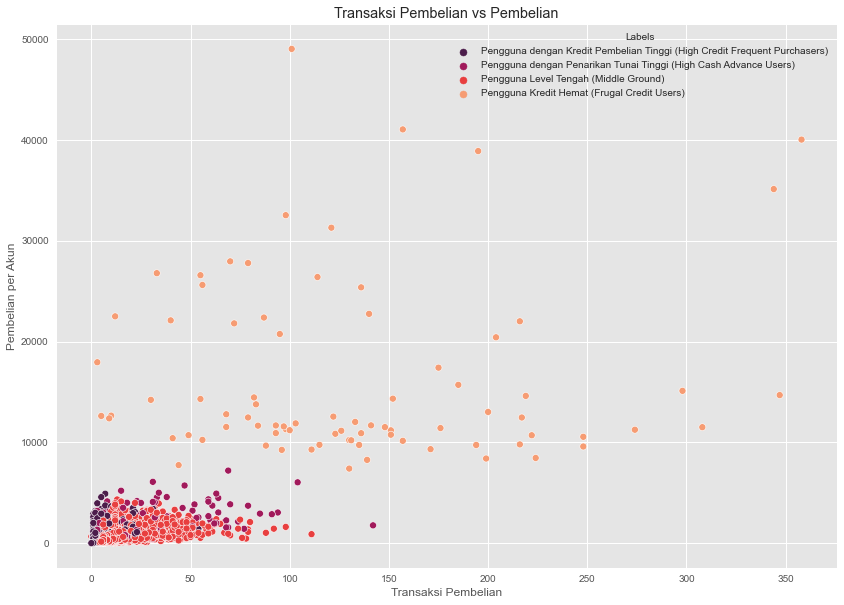

In [84]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

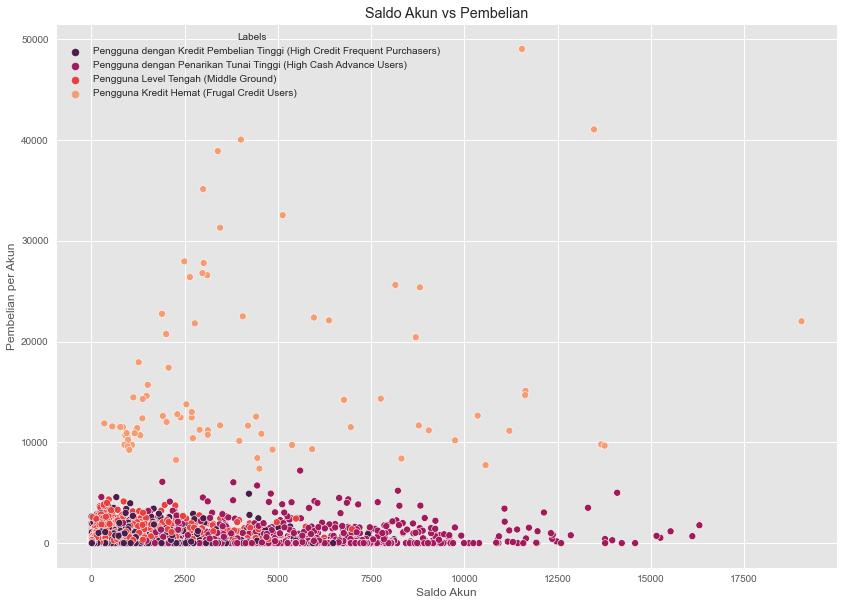

In [85]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

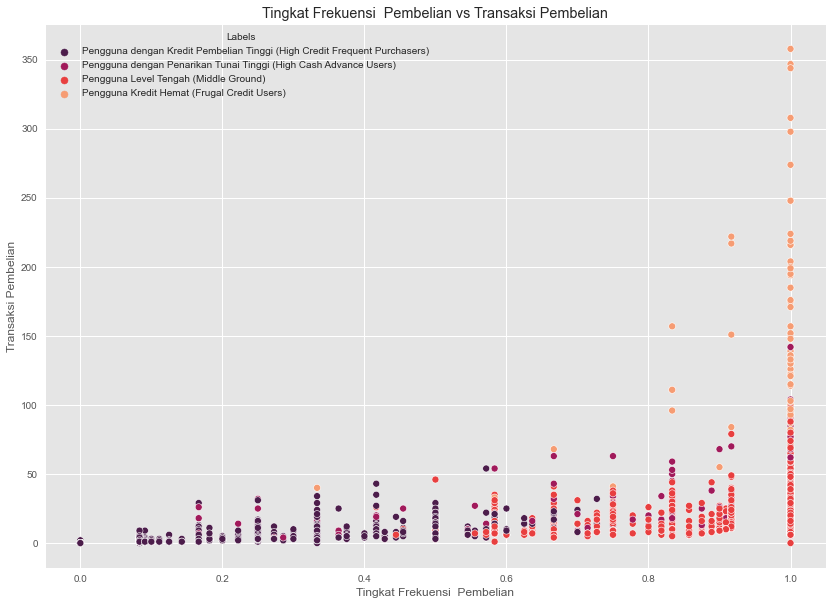

In [86]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

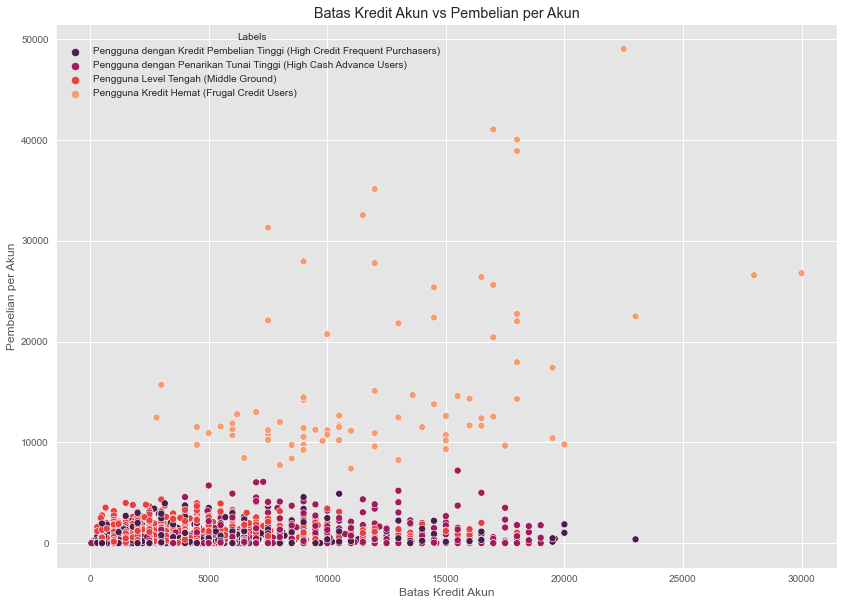

In [87]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

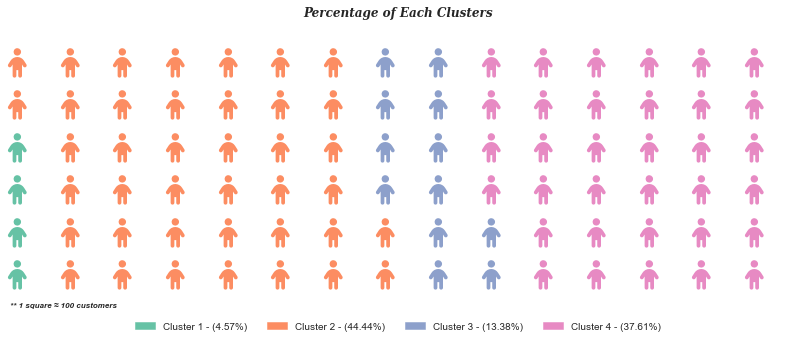

In [114]:
# --- Define K-Means Visualizer & Plots ---
def visualizer(kmeans, km):
    # --- Figures Settings ---
    
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(14, 10))
    
    # --- Waffle Chart ---
    unique, counts = np.unique(km, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, 
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30, 
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2, 
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight = 'bold', style='italic', fontsize=8)
    
# --- Calling K-Means Functions ---
visualizer(kmeans, y_kmeans);

## 2. DBSCAN

In [90]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_data)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
dbscan_df = pd.DataFrame(train_data,columns = data.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.421783,0.634194,0.374181,0.998036,-0.573389,-0.063264,-0.054421,1.097544,-0.581834,0.103661,-0.245769,-0.250311,0.499474,-0.124758,-0.168889,-0.666719,0.425753,0
1,-1.179383,-0.427061,-0.609338,-0.769931,-0.020389,-0.764161,0.895740,-0.895781,1.195310,-0.889944,-0.817772,0.184996,0.642005,-1.067941,-0.818726,1.870902,0.425753,0
2,-1.058930,0.634194,-0.282626,-0.597076,0.387860,-0.764161,0.720788,-0.069714,1.086363,-0.889944,-0.817772,0.184996,-1.326903,-0.832881,-0.716737,1.375059,0.425753,0
3,-0.129122,-1.846545,-0.116864,0.518115,-0.862239,1.936261,-0.994100,-0.069714,-0.989487,1.349065,1.417223,-0.944449,1.871573,0.047340,-0.683557,-0.666719,0.425753,0
4,-0.980472,-0.427061,1.860526,2.107501,-0.862239,-0.764161,1.064390,1.716052,-0.989487,-0.889944,-0.817772,1.053234,0.890019,1.486661,-1.097046,1.375059,0.425753,0
5,-1.176550,-1.480081,-0.854636,-0.502093,-0.862239,-0.764161,-0.498903,0.841526,-0.989487,-0.889944,-0.817772,-0.374537,-1.326903,-1.383995,-0.677786,-0.666719,0.425753,0
6,-0.903533,0.634194,1.183499,1.306943,1.145687,-0.764161,1.227221,1.583203,1.195310,-0.889944,-0.817772,1.707543,1.096597,0.409739,-0.732294,1.885674,0.425753,0
7,-1.178056,-1.979472,-0.656854,-0.769931,-0.107622,-0.764161,-0.694631,-0.895781,-0.548501,-0.889944,-0.817772,-0.790165,-0.832939,-0.843099,-0.663676,1.892556,-1.904242,1
8,1.813292,0.634194,-1.027185,-0.769931,-0.862239,1.436054,-1.265176,-0.895781,-0.989487,1.515826,1.890248,-1.107384,0.890019,0.486646,1.895534,-0.666719,0.425753,0
9,1.075834,0.634194,-1.027185,-0.769931,-0.862239,-0.398779,-1.265176,-0.895781,-0.989487,0.103661,-0.245769,-1.107384,-0.144273,-0.393090,0.908673,-0.666719,0.425753,0


In [92]:
dbscan_df['clusters'].value_counts()

 0    3629
 1     493
-1     324
 2      16
 3       7
 4       5
Name: clusters, dtype: int64

In [93]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [94]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

 0    3629
 1     493
-1     324
 2      16
 3       7
 4       5
Name: clusters, dtype: int64

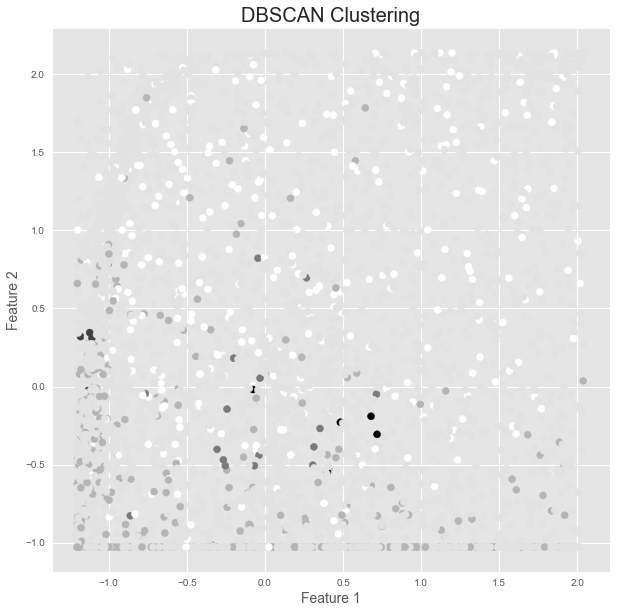

In [100]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

- Dalam jangka waktu layanan kartu kredit pengguna selama 12 bulan memiliki pembayaran minimal 0 dan pembayaran maksimal sebesar 49039.57 atau sekitar 49039.
- Pengguna lebih banyak memilih melakukan pembayaran layanan kartu kredit (tenure) selama 12 bulan dibandingkan yang lainnya.
- Terdapat korelasi positif antara CREDIT LIMIT dengan BALANCE.
- Pengguna kartu kredit dengan jangka waktu pembayaran layanan kartu kredit (TENURE) selama 12 bulan lebih memilih untuk melakukan pembelian dalam jumlah besar dibandingkan dengan pengguna yang memiilih jangka angka waktu pembayaran layanan kartu kredit (TENURE) lainnya.
- Kolom INSTALLMENT PURCHASES memiliki korelasi yang tinggi dengan kolom PURCHASES, kolom CASH ADVANCE FREQUENCY memiliki korelasi yang tinggi dengan PURCHASES FREQUENCY, kolom CASH ADVANCE TRX memiliki korelasi yang tinggi dengan CASH ADVANCE TRX memiliki korelasi yang tinggi dengan PURCHASES TRX, dan seterusnya.
- Clustering dilakukan menggunakan Kmeans dan DBSCAN
- Jumlah cluster pada Kmeans sebanyak 5, hal tersebut sesuai Elbow curve. Dendrogram menunjukkan bahwa data dikelompokkan menjadi nilai cluster dengan batas jarak sebesar 125
- Jumlah cluster pada DBSCAN adalah dua. Hal tersebut berdasarkan hasil Knee Point
- Visualisasi model dilakukan menggunakan PCA